In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display
import face_detector as fd

/home/abolfazl/anaconda3/envs/20Q/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


Running on device: cpu


/home/abolfazl/anaconda3/envs/20Q/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cpu


In [3]:
embeddings_all = torch.load('./Models/detection/embeddings_all.pt')

In [4]:
embeddings_all.shape

torch.Size([117, 512])

In [5]:
#mtcnn = MTCNN(keep_all=True, device=device)
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device)
# mtcnn = fd.load_model()
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

In [7]:
import cv2
a = True
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    
    ret, frame = cap.read()
    # boxes, _ = mtcnn.detect(frame)
    boxes = fd.detect(frame)
    frame_draw = frame.copy()
    frame_draw = Image.fromarray(frame_draw)

        #######################################################
    try:
        print(len(boxes))
        draw = ImageDraw.Draw(frame_draw)
         
        
        
        for i in range (len(boxes)):
            draw.rectangle(boxes[i].tolist(), outline=(255, 0, 0), width=6)
            #######################################################
            
            x1 , x2 , x3 , x4= boxes[i]
            #print(boxes[i])

            im1 = frame_draw.crop((x1, x2, x3, x4))
            img = torch.from_numpy(np.array(im1))

            #im1
            aligned = []
            aligned.append(img)
            #print("Check1") 
            aligned = torch.stack(aligned).to(device)

            aligned = aligned.permute(0, 3, 1 , 2)  
            embeddings = resnet(aligned.float()).detach().cpu()
            #######################################################
            min_diff = 10
            c= -1
            for i in range(embeddings_all.shape[0]):
                diff = (embeddings_all[i] - embeddings).norm()

                if (diff < min_diff):
                    #print(min_diff)
                    min_diff = diff
                    c = i


            #######################################################        
            if c == -1:
                print("NO")
            elif (c <= 70):
                print("Fatemeh")

            elif (c >70 and c < 70+53):
                print("Rezvan")
            #######################################################

        frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
        cv2.imshow('Input', np.asarray(frame_draw))
        
        
        print("----------------------------------------------------------")
        
        
    except:
        cv2.imshow('Input', np.asarray(frame))
        cap.release()
    c = cv2.waitKey(1)
    if c == 27:
        cap.release()
        break

cap.release()
cv2.destroyAllWindows()

1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
----------------------------------------------------------
1
Rezvan
---------------------------------------

In [12]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device)

In [12]:
boxes, _ = mtcnn.detect(frame)

In [13]:
len(boxes)

1

In [14]:
len(boxes[0])

4

In [15]:
boxes[0]

array([ 71.86169, 100.07597, 173.59802, 237.25018], dtype=float32)

In [16]:
x1 , x2 , x3 , x4 = boxes[0]

In [17]:
im1 = frame_draw.crop((x1, x2, x3, x4))

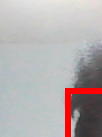

In [18]:
im1

In [19]:
type(im1)

PIL.Image.Image

In [20]:
im1.size

(102, 137)

In [21]:
img = torch.from_numpy(np.array(im1))

In [22]:
img.shape

torch.Size([137, 102, 3])

In [23]:
#im1
aligned = []
aligned.append(img)
print("Check1") 
aligned = torch.stack(aligned).to(device)

Check1


In [24]:
aligned.shape

torch.Size([1, 137, 102, 3])

In [25]:
aligned = aligned.permute(0, 3, 1 , 2)
aligned.shape

torch.Size([1, 3, 137, 102])

In [26]:
type(aligned)

torch.Tensor

In [28]:
aligned = aligned.to(torch.int)

In [29]:
aligned.shape

torch.Size([1, 3, 137, 102])

In [30]:
embeddings = resnet(aligned.float()).detach().cpu()
print("Check2")

Check2


In [31]:


  

#######################################################
min_diff = 10
c= -1
for i in range(embeddings_all.shape[0]):
    diff = (embeddings_all[i] - embeddings).norm()

    if (diff < min_diff):
        print(min_diff)
        min_diff = diff
        c = i


#######################################################        
if c == -1:
    print("NO")
elif (c < 10):
    print("Fatemeh")

elif (c >10 and c < 20):
    print("Rezvan")
#######################################################

10
tensor(1.3976)
tensor(1.3904)


In [32]:
imgw = img.unsqueeze(1) 


In [33]:
imgw.shape

torch.Size([137, 1, 102, 3])